In [13]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from qutip import *
from scipy.optimize import curve_fit
from scipy.integrate import odeint
from scipy.integrate import simpson
plt.rcParams.update({'font.size': 14})
from scipy.integrate import solve_ivp

In [14]:
def coper(N,q0,myu):
    cops=[]
    a=destroy(N)
    adag=a.dag()
    zeta=myu/12
    beta=myu/24
    eta=myu*(q0**2-1)/4
    const1=myu*(q0**2-1)
    const2=3*myu/4
    c1=sqrt(const1)*adag
    c2=sqrt(const2)*a**2
    c3=sqrt(myu)*(adag*a-0.5*adag**2)
    cops.append(c1)
    cops.append(c2)
    cops.append(c3)
    return cops
def hamil(N,omega,q0,myu):
    a=destroy(N)
    adag=a.dag()
    zeta=myu/12
    beta=myu/24
    eta=myu*(q0**2-1)/4
    H=omega*adag*a+(1j*zeta*(adag*a**3-(adag**3)*a))+(1j*beta*(a**4-adag**4))-(1j*eta*(a**2-adag**2))
    return H
def retdiag(rho,N):
    rhoii=[]
    n=[]
    for i in range(N):
        rhoii.append(rho.diag())
        n.append(i+1)
    return n,rhoii
def retdens(H,cops,N):
    expop=rand_dm(N)
    times = np.linspace(0.0, 100.0, 1000)
    result_dm = mesolve(H, expop, times, cops)
    return result_dm.states    
def hamildriven(N,omega,q0,myu,n,omega1,epsilon,phi):
    T=2*np.pi/omega1
    t=np.linspace(0,1000,1000)
    t=t*T
    a=destroy(N)
    adag=a.dag()
    zeta=myu/12
    beta=myu/24
    eta=myu*(q0**2-1)/4
    H=[]
    for i in range (len(t)):
        H.append(omega*adag*a+(1j*zeta*(adag*a**3-(adag**3)*a))+(1j*beta*(a**4-adag**4))-(1j*eta*(a**2-adag**2))-(1j*epsilon*t[i]*(a+adag)))
    return H    
    #H=omega*adag*a+(1j*zeta*(adag*a**3-(adag**3)*a))+(1j*beta*(a**4-adag**4))-(1j*eta*(a**2-adag**2))-(cosine)
    
    return H
def Gauss(x, A, B, C):
    y = A*np.exp(-((x-B)/C)**2)
    return y
def twovdpcoper1(N,q0,myu):
    cops=[]
    a=destroy(N)
    adag=a.dag()
    I=qeye(N)
    zeta=myu/12
    beta=myu/24
    eta=myu*(q0**2-1)/4
    const1=myu*(q0**2-1)
    const2=3*myu/4
    c1=sqrt(const1)*tensor(adag,I)
    c2=sqrt(const2)*(tensor(a**2,I))
    c3=sqrt(myu)*(tensor(adag*a,I)-0.5*tensor(adag**2,I))
    cops.append(c1)
    cops.append(c2)
    cops.append(c3)
    return cops
def twovdpcoper2(N,q0,myu):
    cops=[]
    a=destroy(N)
    adag=a.dag()
    I=qeye(N)
    zeta=myu/12
    beta=myu/24
    eta=myu*(q0**2-1)/4
    const1=myu*(q0**2-1)
    const2=3*myu/4
    c1=sqrt(const1)*tensor(I,adag)
    c2=sqrt(const2)*(tensor(I,a**2))
    c3=sqrt(myu)*(tensor(I,adag*a)-0.5*tensor(I,adag**2))
    cops.append(c1)
    cops.append(c2)
    cops.append(c3)
    return cops
    
def twovdpcouplingcoper(cops1,cops2,N,D):
    cops=[]
    a=destroy(N)
    adag=a.dag()
    I=qeye(N)
    for i in range(len(cops1)):
        cops.append(cpos1[i])
    for i in range(len(cops2)):
        cops.append(cpos2[i])
    c3=sqrt(D)*(tensor(a,I)-tensor(I,a))
    cops.append(c3)
    return cops
def linexp(x,A,alpha,mean):
    y=A*(x**2)*np.exp(-(alpha)*(x-mean)**2)
    #y=A*x
    return y
def probrec(myu,q0,diag):
    N=3000
    p=np.zeros(N)
    #p[0]=np.random.uniform(0,1)
    #p[1]=np.random.uniform(0,1)
    p[0]=0
    p[1]=diag[0]
    p[2]=diag[1]
    #p[2]=np.random.uniform(0,1)
    n=0
    for i in range(N-3):
        p[i+3]=-(4/(3*myu*(n+2)))*(((-myu*(q0**2-1))*p[i+1])+((3*myu/4)*(n*p[i+2]))-((myu/4)*(n*p[i]+(n+2)*p[i+1])))
        n+=1
        
    return p
def coherence(dm,N):
    add=0
    s=dm.full()
    for j in range(N):
        for k in range(N):
            if (j!=k):
                add+=abs(s[j][k])
    return add
def model(z,t,myu,q0):
    omega=1
    x=z[0]
    y=z[1]
    dxdt=omega*y
    dydt=-myu*dxdt*(x**2-q0**2)-omega*x
    dzdt=[dxdt,dydt]
    return dzdt
def Gauss(x, A, B, C):
    y = A*np.exp(-((x-B)/C)**2)
    return y
def expdecay(x,lam,A):
    y=A*np.exp(-lam*x)
    return y
def linfit(x,lam,C):
    y=lam*x+C
    return y
def sinfreq(x,A,omega,phi):
    y=A*np.sin(omega*x+phi)
    return y
def eig(myu,qo,omega):
    e=[((myu*q0**2)+1j*sqrt(4*omega**2-(myu**2)*q0**4))/2,((myu*q0**2)-1j*sqrt(4*omega**2-(myu**2)*q0**4))/2]
    return e
def retindex(tl,period):
    index2=0
    t2=0
    t2=tl[0]+abs(period)
    epi=0.01
    for i in range(len(tl)):
        if tl[i]<=(t2+epi) and tl[i]>=(t2-epi):
            index2=i
    return index2
def jacob(omega,q0,myu,q,p):
    j=np.zeros((2,2))
    j[0][0]=0
    j[0][1]=omega
    j[1][0]=-2*myu*q*p-omega
    j[1][1]=-myu*(q**2-q0**2)
    return j
def floquet(omega,q0,myu,position,momentum,times,T):
    final=np.identity(2)
    I=np.identity(2)
    for i in range(len(times)):
        q=position[i]
        p=momentum[i]
        final=final*(I+(T/len(times))*(jacob(omega,q0,myu,q,p)))
    return final
def square(list):
    return [i ** 2 for i in list]
def findper(xl,tl,ep):
    k=0
    for i in range(1,len(xl)):
        if (xl[i]<(xl[0]+ep)) and (xl[i]>(xl[0]-ep)):
            k=i
    tp=tl[k]-tl[0]
    return 2*tp
def vdp(t,z):
    x, y = z
    return [omega*y, -mu*y*(x**2-q0**2)-omega*x]

def root(t, y): return y[0] 
       

In [68]:
q0=3
omega=1
N=30
myu=[0.001,0.009,0.03,0.05,0.07,0.1]

In [69]:
period=[]
t=np.linspace(0.0, 100.0, 10000)
for i in range(len(myu)):
    mu=myu[i]
    sol = solve_ivp(vdp, [0, 100], [3, 3], t_eval=t,events=root)
    zeros = sol.t_events[0]
    spacing = zeros[1:] - zeros[:-1]
    deltas = spacing[1:] - spacing[:-1]
    period.append(2*spacing[-1])
period

[6.280978248284924,
 6.281247212075016,
 6.284082251841312,
 6.278474519699756,
 6.3173884057733005,
 6.333299268350601]

In [71]:
fl=[]
for i in range(len(myu)):
    x = np.empty_like(times)
    y = np.empty_like(times)
    z0=[3,3]
    x[0] = z0[0]
    y[0] = z0[1]
    for j in range(1,len(times)):
        tspan = [times[j-1],times[j]]
        z = odeint(model,z0,tspan,args=(myu[i],q0))
        x[j] = z[1][0]
        y[j] = z[1][1]
        z0 = z[1]
    xl=x[9300:]
    yl=y[9300:]
    tl=times[9300:]
    index1=0
    index2=0
    index2=retindex(tl,period[i])
    final=floquet(omega,q0,myu[i],xl[index1:index2],yl[index1:index2],tl[index1:index2],tl[index2]-tl[index1])
    el,ev=np.linalg.eig(final)
    fl.append(el[1])

In [72]:
flexp=[]
for i in range(len(myu)):
    flexp.append(log(fl[i])/abs(period[i]))

In [73]:
flexp

[-0.003642625196111168,
 -0.08110414369392792,
 -0.27270887794122,
 -0.44855428246414447,
 -0.6553637777212913,
 -0.9072617321302837]

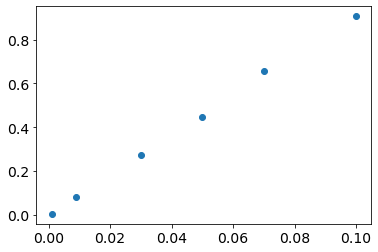

In [74]:
plt.scatter(myu,np.abs(flexp))